In [1]:
import cv2

print(cv2.__version__)

3.4.2


In [ ]:
# jpg,png,gif,jfif

In [3]:
# 이미지 읽어오기
img = cv2.imread('chu.jpg')
img.shape
# RBG 값을 가져옴
# 각 픽셀의 값을 R,B,G 총 3개의 값으로 가져옴
cv2.imshow('figure',img)

# 이미지를 파이썬에서 띄우는게 아니라 윈도우에서 띄움
# 띄우는 행위는 파이썬이 하기 때문에 닫는 행위도 파이썬에서 제어 해줘야함
# 윈도우에서 끄게되면 파이썬이 돌아가고 있어서 커널을 다시 시작해줘야함
# 따라서 닫는 키도 지정해줘야함

# 키입력을 기다림
# 0이라고 입력하면 무한정 대기
# ms = 1000이 1초
# 3000: 키 입력을 3초 동안 기다림
# 3초후에 아래 코드 실행

# 0: 키 입력을 무한정 대기
# 아무 키나 입력을 했을때 아래 코드 실행
cv2.waitKey(0)


#떠있는 창을 모두 닫음
cv2.destroyAllWindows()
# 닫을 때는 X로 닫으면 안됨 실행하고 아무키누르면 닫힘

matplotlib 라이브러리와 연동

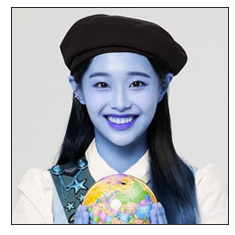

In [6]:
import cv2
import matplotlib.pyplot as plt

# cv2.IMREAD_COLOR: 이미지를 컬러 데이터로 읽어옴
img = cv2.imread('chu.jpg',cv2.IMREAD_COLOR)

# 이미지니까 틱을 없애버리자
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.show()

# 기존 이미지는 RGB값을 사용해서 이미지를 표현
# 파이썬 BGR로 데이터를 읽음
# Red > Blue로 표현
# Blue > Red로 표현


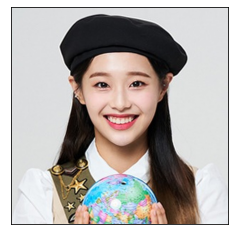

In [7]:

import cv2
import matplotlib.pyplot as plt

# cv2.IMREAD_COLOR: 이미지를 컬러 데이터로 읽어옴
img = cv2.imread('chu.jpg',cv2.IMREAD_COLOR)

# 색상 공간을 변화
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

# 이미지니까 틱을 없애버리자
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.show()

이미지 종류
- color 이미지: RGB 색상을 구성된 이미지
- gray Scale 이미지: 0 - 255 값으로 구성된 흑백이미지
- 이진 이미지 : 0과 1(255)값으로 구성된 흑백이미지
- 'HSV 이미지 : 색상(Hue),채도(Saturaino),명도(Value)로 구성된 이미지

In [8]:
# 나중에 데이터를 변환할때 어떤 식으로 사용해할지 판단

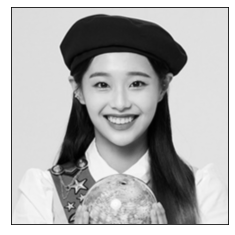

In [11]:
# 컬러이미지를 흑백이미지(Gray Scale)로 변환해서 출력
#하나의 셀만 실행시켜도 바로 출력값을 가지게 하기위해서 import를 계속 해줌
import cv2
import matplotlib.pyplot as plt
#cv2.IMREAD_GRAYSCALE: 이미지를 흑백으로 
img = cv2.imread('chu.jpg',cv2.IMREAD_GRAYSCALE)

#cmap = 'gray'흑백을 읽는 코드
# 컬러 > 흑백으로 변환해서 이미지를 출력
# 이 과정에서 이미지가 약간 깨질 수 있음
# interpolation = 'bicubic' : 보관법(이미지가 깨지는 현상을 방지)
# 큐빅(사각형)을 기준으로 근접 픽셀들에 대해서 중간값, 평균값등으로 계산해서 보완
plt.imshow(img, cmap='gray',interpolation = 'bicubic')
plt.xticks([])
plt.yticks([])
plt.show()



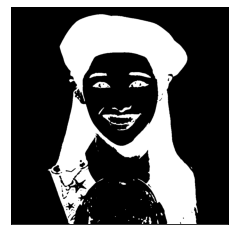

In [19]:
# 이진 이미지

import cv2
import matplotlib.pyplot as plt
img = cv2.imread('chu.jpg',cv2.IMREAD_GRAYSCALE)

# threshold(이미지 데이터, 기준값, 기준값보다 큰 경우 할당되는 값,할당 조건)
# 기준값보다 작은건 0 으로 할당, 기준값보다 큰 건 255(변환되는 데이터는 0아니면 255):cv2.THRESH_BINARY
# cv2.THRESCH_BINARY_INV : 기준값보다 크면 0으로 할당, 기준값보다 작으면 255로 할당

# 이미지 픽셀값이 0(검정색), 255(흰색) 두가지 값으로 구성
# 두가지 값 출력
# _: 기준값
# thimg : 변환 이미지
_, thimg = cv2.threshold(img,128,255,cv2.THRESH_BINARY_INV)

plt.imshow(thimg, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

카메라 영상, 동영상 불러오기

In [5]:
import cv2

# 예외처리
try:
    # 동영상 파일 
    cap = cv2.VideoCapture('video.mp4')
    print('동영상을 가져오기 성공')
except:
    print('동영상 가져오기 실패')

# 동영상 크기
cap.set(3,480)# 가로크기
cap.set(4,320)#세로크기

while True:
    # 동영상에서 이미지를 한 장씩 읽어온다.
    # frame: 읽어온 이미지가 저장
    # ret: 이미지를 읽으면 True, 읽지 못하면 False
    ret, frame=cap.read() 
    
    if not ret :
        print('이미지 읽기 실패')
        cap.release()# 비디오 객체 종료
        cv2.destroyAllWindows() #윈도우 창 닫기 
        break
    # 이미지를 읽었다면 
    cv2.imshow('video',frame)
    
    k = cv2.waitKey(33)
    # k에는 입력된 키값이 저장
    # cv2.waitKey(16) : 0.0165초마다 1개의 사진을 출력> 1초에 60장의 사진을 출력
    # 0.033초 1개의 사진을 0.033초 만큼 출력
    # 일반적으로 동영상은 1초에 30장의 이미지로 구성
    # 동영상을 2배속으로 돌려보자 
    
    # 동영상을 원하는 시점에서 종료해보자!
    # 숫자 1을 누르면 비디오를 종료하고 윈도우 창을 닫음
    # k 가 1일때
    if k == 49 : #숫자 1에 해당하는 ASCII값이 49
        cap.release() #비디오 객체 종료
        cv2.destroyAllWindows() #윈도우창 닫기
        break
    

동영상을 가져오기 성공


동영사 녹화하기

In [7]:
# 숫자2를  누르면 녹화가 시작되도록
import cv2

try : 
    # 숫자 적기 가지고 있는 캠마다 번호가 달림
    cap = cv2.VideoCapture(0) # 몇번째 카메라를 켜겠다.
    print("카메라 구동 시작")
except:
    print("카메라 구동 실패")
    
# 녹화 설정
fps = 30.0 # 녹화할 프레임 수 
width = int(cap.get(3)) #녹화할 영상의 가로 크기 (숫자는 속성값)
height = int(cap.get(4)) # 녹화할 영상의 세로 크기

# 코덱설정 MPEG, DIVX
fcc = cv2.VideoWriter_fourcc(*'MPEG')

# 녹화 설정 적용(파일명, 코덱, 프레임수, 크기)
out = cv2.VideoWriter('cctv01.mp4', fcc, fps, (width,height))

# 카메라로부터 동영상 프레임을 계속 읽어오기
record = False
while True : 
    # ret : 성공여부
    # frame: 한프레임씩 읽어서 저장
    ret, frame = cap.read()
    
    # 프레임 읽기 실패한 경우
    # 카메라 해제, 왼도우 창 닫기 
    if not ret : 
        print('프레임 읽기 실패 ')
        cap.release() # 카메라 해제
        cv2.destroyAllWindows() # 윈도우창 닫기
        break
    
    # 프레임 읽기 성공한 경우에는 동영상 출력
    cv2.imshow('cctv',frame)
    
    # 초당 30장의 프레임이 실행되도록 설정
    k= cv2.waitkey(33)
    
    # 1을 입력받으면 녹화 종료
    if k == 49:
        print('녹화를 종료합니다')
        cap.release()
        out.release()
        cv2.destroyAllWindows()
        break
        
    # 숫자 2를 눌렀을때 녹화 시작
    # 숫자 2는 ASCII 코드로 50의 값을 가지고 있음
    
    elif k == 50:
        record = True
    if record == True: #record가 True면
        out.write(frame) #녹화를 시작하겠다.
        #elif k == 50: 
        #숫자2를 누르고 있을때 녹화가 됨
        # 녹화 시작 
        #out.write(frame)

카메라 구동 시작
프레임 읽기 실패 


비디오에서 이미지 한 프레임만 저장

In [10]:
import cv2

try : 
    cap = cv2.VideoCapture('video.mp4')
    print('카메라 구동')
except :
    print('카메라 구동 실패')

# 파일의 순서를 저장
num = 1
while True:
    ret, frame = cap.read()
    
    if not ret : 
        print('비디오 종료')
        cap.release()
        cv2.destroyAllWindows()
        break
    cv2.imshow('video',frame)
    
    k = cv2.waitKey(33)
    
    if k == 49: #1을 눌렀을때
        cap.release()
        cv2.destroyAllWindows()
        break
        
    # 화면 캡쳐
    # 숫자 2를 누르면 현재 프레임을 test1.png, test2.png, test3.png
    elif k == 50:
        # 저장할 파일 이름 출력
        print('test{}.png'.format(num))
        
        #(파일명, 저장할 프레임, params = [압축여부,압축단계])
        # 압축단계: 0~9(큰 값일수록 많이 압축)
        cv2.imwrite('test{}.png'.format(num),frame,
                   params = [cv2.IMWRITE_PNG_COMPRESSION,0])
        num = num + 1

카메라 구동
test1.png
test2.png


이미지처리
 - 픽셀 기반 처리
   - pixel : 이미지를 구성하는 가장 작은 요소(0 ~ 255 사이의 값을 가짐)
   
 - 블록 기반 처리
   - 픽셀을 기준으로 이미지를 처리하게되면 처리할게 많음
   - 일반적으로는 픽셀 하나로 특징을 잡기 어려움
   - 블록(block) : 픽셀을 가로 / 세로 일정 크기로 잘라놓은 이미지
   - ROI : 이미지 내 관심 영역
   
 - 주파수 기반 처리
   - 픽셀 값들간 차이( = 주파수)를 기반으로 이미지를 처리하는 방법
   - 주변 픽셀들과의 차이가 크면 고주파
   - 주변 픽셀들과의 차이가 작으면 저주파
   - 용량이 많이 줄어들어서 이미지 처리 용이
   
   

픽셀 기반 처리 

In [1]:
# 픽셀 값 읽기
import cv2
 
img = cv2.imread('chu.jpg')

px = img[100,100]# 100, 100 위치의 픽셀값을 출력
# R : 182
# G : 197
# B : 223
px

array([222, 220, 219], dtype=uint8)

In [2]:
# 픽셀 값 변경
# [0,0,0] = 검은색
img[500,500] = [0,0,0]
img[501,500] = [0,0,0]
img[500,501] = [0,0,0]
img[501,501] = [0,0,0]

cv2.imshow('pixel',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
# 이미지의 속성 출력
print(img.shape) # 이미지의 크기
print(img.size) # 이미지의 픽셀의 수 255 * 255 * 3 
print(img.dtype) # 픽셀값의 타입 unit 8 = unsigned int8, 부호가 없는 0 ~ 255사이의 숫자


(900, 900, 3)
2430000
uint8


In [1]:
# ROI (Region of Image) 
# 이미지 내에서 관심영역 자르기 

import cv2

img = cv2.imread('chu.jpg')
#행, 열
#세로, 가로
roi_img = img[30:700, 20:880]

cv2.imshow('roi',roi_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

이미지에 도형 그리기
- cv2.line(배경이미지, 시작점좌표, 끝점좌표, 색상, 선두께) : 직선 그리기 함수
- cv2.circle(배경이미지, 중심좌표, 반지름, 색상, 선두께) : 원 그리기 함수
- cv2.rectangle(배경이미지, 좌상단점좌표, 우하단점좌표, 색상, 선두께) : 사각형 그리기 함수
- cv2.ellipse(배경이미지, 중심좌표, 장축/단축길이, 호의시작각, 호의 종료각, 색상, 선두께) : 타원 그리기 함수
- cv2.putText(배경이미지, 출력내용, 출력시작좌표, 폰트, 크기, 색상, 굵기) : 텍스트 입력 함수

In [22]:
# 사진에서 얼굴영역에 사각형을 그리기
# 사진 출력 

import cv2
img =cv2.imread('chu.jpg')


#가지고온 img에 원하는 영역에 사각형 추가
img = cv2.rectangle(img, (200,190),(610,610),(0,0,255),3)
cv2.imshow('chu',img)
cv2.waitKey(0)

# destroy인데 destory로 오타가 나있었어요 !
#선생님 왜 제꺼는 사각형이 안보이는걸까요?
# 이미지를 출력하는 코드가 cv2.imshow인데 사각형을 추가하기 전에 이미지를
# 출력했기 때문입니다 !
# 감사합니다!
cv2.destroyAllWindows()

In [41]:
# 한글출력

import cv2
from PIL import ImageFont, ImageDraw, Image #이미지를 편집할때 쓰는 라이브러리
import numpy as np

img = cv2.imread('chu.jpg')
img = cv2.rectangle(img, (210,180),(660,610),(0,0,255),3)

#폰트 설정,폰트사이즈
font = ImageFont.truetype('Jalnan.ttf',20)

# numpy 배열 > 파이썬에서 편집할 수 있는 이미지로 변환(폰트 저장용)
img_font = Image.fromarray(img)
draw = ImageDraw.Draw(img_font)

# 폰트 적기
# 출력 시작 좌표, 출력내용, 폰트,색상
draw.text((270,250),'chu',font=font,fill=(0,0,255))

# 이미지 > numpy
img = np.array(img_font)

cv2.imshow('font',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


#RGB는 많이 쓰이지 않음 색상이 볼때마다 달라진다는 한계
#CMYK 프린터에서 쓰임
#HSV 
- 색상, 채도, 명도 (밝기에 따라 색이 달라진다는 한계 극복)
- 색상 : 각도(- 180 ~180도)
- 밝아짐 : 채도 : 반지름(0 ~ 255)
- 어두움 : 명도 : 깊이(0 ~ 255)

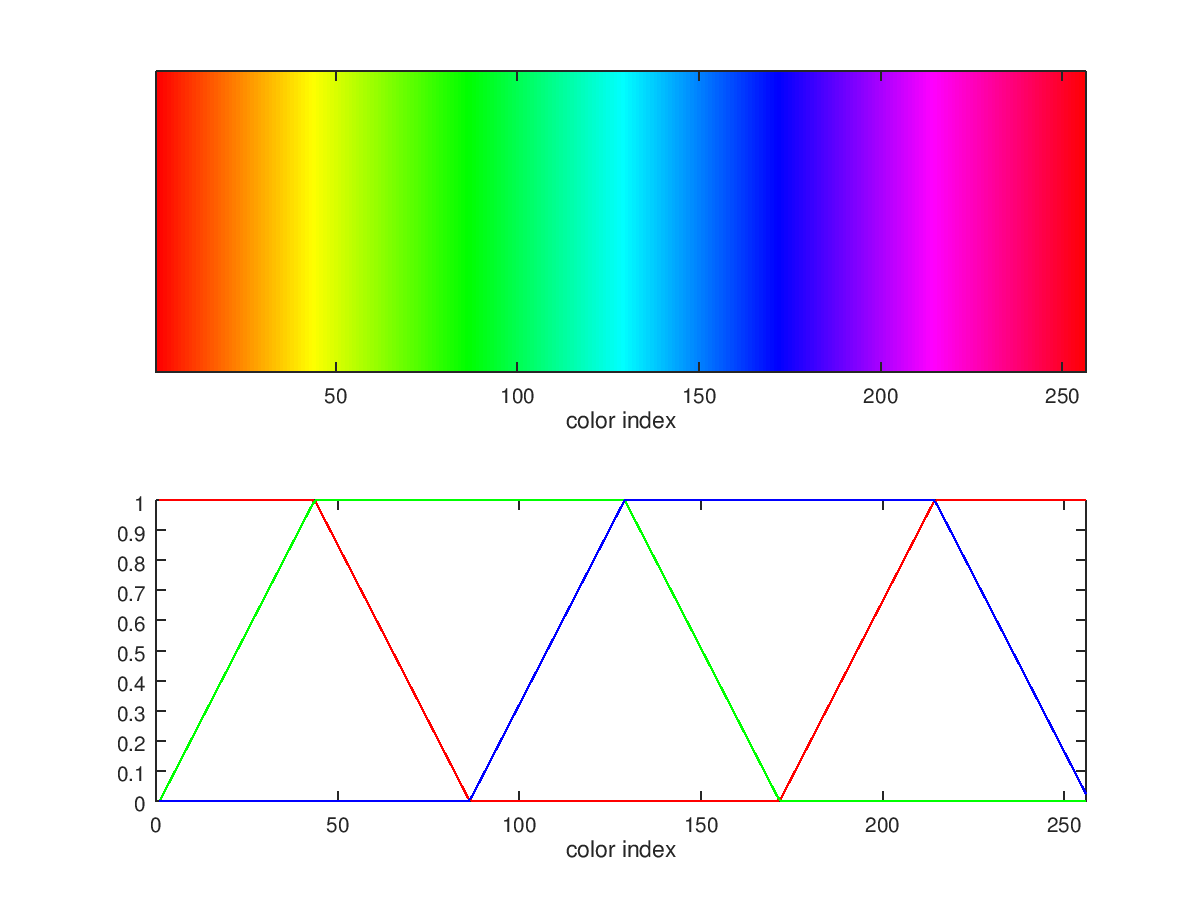


HSV 색상공간을 사용해서 원하는 색상만 출력하기

In [44]:
import cv2
import numpy as np
 
img = cv2.imread('color.jpg')

# BGR 색상을 HSV색상으로 변환
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 빨간색의 영역
# 최소값
lower = np.array([-10,100,100])#색상,채도,명도
# 최대값
upper = np.array([10,255,255])

# 최소값과 최대값의 범위에 해당하는 이미지를 선택
mask = cv2.inRange(hsv, lower, upper)

#(이미지1, 이미지2, 적용 영역)
# 이미지1과 이미지2를 비교 mask값으로 비교 둘다 일치하면 
#출력 아니면 0
img2 = cv2.bitwise_and(img,img,mask = mask)

cv2.imshow('red ballon',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

녹색, 노랜색, 파란색 풍선 자르기

In [49]:
import cv2
import numpy as np
img = cv2.imread('color.jpg')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#최소값
lower = np.array([250,100,100])
#최대값
upper = np.array([250,255,255])

mask = cv2.inRange(hsv,lower,upper)

img2 = cv2.inRange(hsv,lower,upper)

img2 = cv2.bitwise_and(img,img,mask = mask)

cv2.imshow('blue ballon',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [50]:
#파란풍선
import cv2
import numpy as np
img = cv2.imread('color.jpg')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#최소값
lower = np.array([60,100,100])
#최대값
upper = np.array([120,255,255])

mask = cv2.inRange(hsv,lower,upper)

img2 = cv2.inRange(hsv,lower,upper)

img2 = cv2.bitwise_and(img,img,mask = mask)

cv2.imshow('blue ballon',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [52]:
#초록풍선
import cv2
import numpy as np
img = cv2.imread('color.jpg')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#최소값
lower = np.array([40,100,100])
#최대값
upper = np.array([100,255,255])

mask = cv2.inRange(hsv,lower,upper)

img2 = cv2.inRange(hsv,lower,upper)

img2 = cv2.bitwise_and(img,img,mask = mask)

cv2.imshow('blue ballon',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 침식/팽창
- 이진이미지 처리 방법
- Erosion(침식) : 이미지 경계부분에서 1을 0 으로 변환하는 방법, 검은색을 확장
- Dilation(팽창) : 이미지 경계부분에서 0을 1로 변환하는 방법, 흰색을 확장


In [55]:
import cv2
import numpy as np

# 흑백 이미지로 읽기
img = cv2.imread('whitefont.png',cv2.IMREAD_GRAYSCALE)

cv2.imshow('original',img)

# 침식/ 팽창의 크기를 설정
kernel = np.ones((3,3),np.uint8)

# 침식
# 이미지, 침식의 크기, 변환을 몇번할 것인지
#변환을 많이하면 침식이 많이 일어남
erosion = cv2.erode(img, kernel, iterations = 1)

cv2.imshow('erosion',erosion)

#팽창
dilation = cv2.dilate(img,kernel,iterations = 1)

cv2.imshow('dilation',dilation)

cv2.waitKey(0)
cv2.destroyAllWindows()

침식과 팽창을 이용해서 잡음을 제거(솔트잡음)
- 침식 검은색을 키움
- 팽창 흰색을 키움
- Opning : 침식후에 팽창을 진행, 검정배경에 흰잡음이 있는 경우 사용
- Closing : 팽창후에 침식을 진행, 흰색배경에 검정잡음이 있는 경우


In [3]:
# Opening
import cv2
import numpy as np

img = cv2.imread('A.png',cv2.IMREAD_GRAYSCALE)

cv2.imshow('original',img)


#Opening
kernel = np.ones((3,3),np.uint8)

# 이미지,오프닝/클로징,침식과 팽창의 크기
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

cv2.imshow('opening',opening)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
# Closing
import cv2
import numpy as np

img = cv2.imread('B.png',cv2.IMREAD_GRAYSCALE)

cv2.imshow('original',img)


#Opening
kernel = np.ones((3,3),np.uint8)

# 이미지,오프닝/클로징,침식과 팽창의 크기
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

cv2.imshow('closing',closing)

cv2.waitKey(0)
cv2.destroyAllWindows()

이미지 특성 추출 - 에지, 윤곽선
- Edge : 이미지의 경계 부분(고주파)
- Contour : 에지부분을 폐곡선으로 만든 특성
- 폐곡선 : 시작점과 끝점이 만나는 곡선

Canny 에지 추출기
- 대중적인 추출기

In [1]:
import cv2

img = cv2.imread('chu.jpg',cv2.IMREAD_GRAYSCALE)
cv2.imshow('original',img)
# 이미지, 픽셀의 최소값, 최대값
edge = cv2.Canny(img, 10,100)
edge = cv2.bitwise_not(edge)

cv2.imshow('edge',edge)
cv2.waitKey(0)
cv2.destroyAllWindows()


히스토그램 그리기
- 이미지에 포함된 픽셀값들이 몇개씩 분포되어있는지 확인
- 빈도수 분석

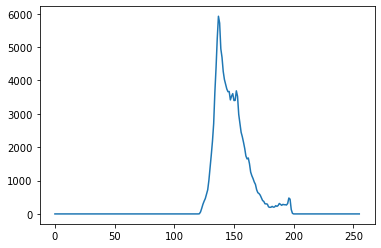

In [6]:
#히스토그램
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('histogram.png',cv2.IMREAD_GRAYSCALE)

cv2.imshow('original',img)

# 이미지, 채널(흑백 0, 컬러 : Blue(0),Green(1),Red(2))
#마스크영역,색상의수,픽셀값의 범위
hist = cv2.calcHist([img],[0],None,[256],[0,255])

plt.plot(hist)
cv2.waitKey(0)
cv2.destroyAllWindows()

히스토그램 균일화(평활화)
- 히스토그램 분포가 전체 픽셀에 대해 고르게 분포하도록 만드는것(정규화)
- 흐릿한 이미지를 선명하게 만들 수 있음

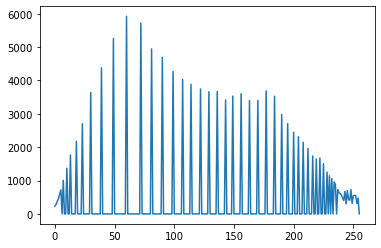

In [7]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('histogram.png',cv2.IMREAD_GRAYSCALE)

cv2.imshow('original',img)

# 히스토그램 평활화
img2 = cv2.equalizeHist(img)

cv2.imshow('equalize',img2)
# 이미지, 채널(흑백 0, 컬러 : Blue(0),Green(1),Red(2))
#마스크영역,색상의수,픽셀값의 범위
hist = cv2.calcHist([img2],[0],None,[256],[0,255])

plt.plot(hist)
cv2.waitKey(0)
cv2.destroyAllWindows()

탬플릿 매칭
- 큰 이미지내에서 내가 원하는 작은 이미지를 찾기 

In [3]:
import cv2
import numpy as np

# 배경
# 결과 이미지용 컬러 사진
img1 = cv2.imread('younineri.png')#배경은 컬러로 사용하기때문에

#사과
img2 = cv2.imread('apple.png',cv2.IMREAD_GRAYSCALE)

# 배경을 GraySale
# 템플릿 매칭용
img1_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

# 찾아야하는 이미지의 크기 계산
#h:행,w:열(세로길이와 가로길이 저장)
h,w = img2.shape

# 템플릿 매칭(내가가지고 있는 배경에서 사과찾기)
# 배경이미지, 찾을이미지, 매칭방법
res = cv2.matchTemplate(img1_gray, img2, cv2.TM_CCOEFF_NORMED)

loc = np.where(res > 0.7)#불리언 인덱싱 생각하면됨

#[::-1]: 첫번째 인덱스와 두번째 인덱스값을 서로 바꾸겠다.
# height, width > x,y
for pt in zip(*loc[::-1]):
    cv2.rectangle(img1,pt,(pt[0]+w,pt[1]+h),(0,0,255),2)
    
cv2.imshow('match',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
import numpy as np
a= np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
np.where(a>5)

(array([6, 7, 8, 9], dtype=int64),)

In [22]:
# zip() : 2개 이상의 리스트나 튜플에서 동일위치에 있는 값들끼리 묶어줌
# 튜플로 변환

x = [1,2,3,4]
y = [5,6,7,8]

a = zip(x,y)
for pt in a:
    print(pt)

(1, 5)
(2, 6)
(3, 7)
(4, 8)


In [26]:
# [::-1] : 위치를 서로 바꾸는 것
# * 함수의 매개변수의 수가 정해져있지 않을때 사용

loc = (np.array([1,2,3,4]),np.array([5,6,7,8]))

for pt in zip(*loc[::-1]):
    print(pt)

(5, 1)
(6, 2)
(7, 3)
(8, 4)


In [27]:
# * : 함수의 매개변수의 수가 정해져있지 않을 때 사용
# def sum(a,b):
# return a + b
def add(*num):
    return np.sum(num)

print(add(2,3))
print(add(2,3,4))
print(add(2,3,4,5,6))

5
9
20


In [15]:
loc #유사도가 0.7이상인가

(array([ 76,  76,  76,  76,  76,  76,  76,  77,  77,  77,  77,  77,  77,
         77,  77,  78,  78,  78,  78,  78, 135, 135, 135, 136, 136, 136,
        136, 136, 136, 137, 137, 137, 137, 137, 137, 137, 137, 137, 138,
        138, 138, 217, 217, 218, 218, 219, 219, 219, 255, 255, 255, 255,
        255, 255, 256, 256, 256, 256, 256, 256, 256, 256, 256, 257, 257,
        257, 314, 314, 315, 315, 316, 316], dtype=int64),
 array([107, 108, 109, 227, 228, 316, 317, 107, 108, 109, 226, 227, 228,
        316, 317, 107, 108, 227, 316, 317,  33, 182, 346,  33,  34, 182,
        183, 346, 347,  32,  33,  34, 181, 182, 183, 345, 346, 347,  33,
        182, 346, 495, 496, 495, 496, 494, 495, 496,  48,  49, 227, 228,
        391, 392,  47,  48,  49, 226, 227, 228, 390, 391, 392,  48, 227,
        391, 152, 153, 152, 153, 152, 153], dtype=int64))

In [12]:
img1_gray

array([[147, 141, 141, ..., 146, 146, 151],
       [  9,   0,   0, ...,   0,   0,   9],
       [  9,   0,   0, ...,   0,   0,   9],
       ...,
       [  9,   0,   0, ...,   0,   0,   9],
       [  9,   0,   0, ...,   0,   0,   9],
       [  9,   0,   0, ...,   0,   0,   9]], dtype=uint8)

In [11]:
res.shape #전부다 숫자로 된 값을 가지고 있음 
#1의 가까울수록 유사하고 0에 가까울수록 유사하지 않음

(346, 574)

In [13]:
img2.shape

(26, 23)

이미지에서 원 찾기
- Hough 변환 이용

In [ ]:
import cv2
import numpy as np

img = cv2.imread('dragonball.jpg')

img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Hough 변환으로 원찾기 
# 이미지, 검색방법, dp, 원의 중심점간의 최소거리
# param1 : Canny연산자의 최대값
# param2 : 카운트값(작으면 많은 원을 찾고, 크면 적은 수의 원을 찾음)
# minRadius : 원의 최소 반지름
# maxRadius : 원의 최대 반지름

circle = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT,1,10,
                          param1 = 60,
                          param2 = 30,
                          minRadius = 20,
                          maxRadius = 40)

# 원의 중심점간의 최소거리
# param2,minRadius,maxRadius(잘조정하면 이미지에서 잘 찾아올수 있음)

# 원이 검색되었다면 
if circle is not None :
    # 반올림(중심좌표 X, 중심좌표 Y, 반지름)
    circle = np.uint16(np.around(circle)) #반올림해서 정수형으로 바꿔줌
    
    # 검색된 원을 그린다
    for i in circle[0,:]:
        #cv2.circle(배경이미지,중심좌표,반지름,색상,선두께): 원 그리기 함수
        cv2.circle(img,(i[0],i[1]),i[2],(255,0,0),4)
        
    cv2.imshow('circle',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print('원이 없습니다.')

In [7]:
circle

array([[[334.5, 169.5,  37.1],
        [330.5,  71.5,  37.2],
        [339.5, 266.5,  37.1]]], dtype=float32)

모서리 검출

In [ ]:
import cv2
import numpy as np

img = cv2.imread('sunder.png')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# (이미지,코너갯수,기준값,코너점 간의 최소 거리)
corners = cv2.goodFeaturesToTrack(img_gray, 60, 0.001,5)

# 좌표값은 정수로 변화해야함
corners = np.int0(corners)

#코너 좌표마다 점찍기
for i in corners: 
    # ravel(): 다차원배열을 1차원 배열으로 변환
    x,y = i.ravel()
    
    # 점 찍기 
    # - 1: 원의 내부색을 채움
    cv2.circle(img, (x,y), 3 , (255,0,0),-1)
    
cv2.imshow('corner',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
corners

In [15]:
import cv2

# 얼굴 검출기(얼굴을 찾는 알고리즘)
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
# 얼굴 안에있는 눈 검출기 (눈을 찾는 알고리즘)
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")

# 얼굴과 눈을 검출할 이미지 로드
img = cv2.imread('doctor.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검출기를 적용해서 얼굴좌표를 가져옴(시작x좌표,시작y좌표,길이,높이)
# 이미지명,스케일값,최소이웃값
faces = face_cascade.detectMultiScale(img_gray, 1.1, 5)

# 찾은 얼굴 좌표를 이용해서 원 이미지에 얼굴 ROI를 사각형으로 그려줌
for (x, y, w, h) in faces:
    # 이미지에 사각형 그리기
    # 이미지값, 좌상단좌표, 우하단좌표, 선의 색, 선의 굵기
    cv2.rectangle(img, (x,y), (x+w,y+h),(0,0,255),2)
    
    # 얼굴 부분에서 눈 영역을 검출
    # 얼굴 ROI를 저장
    roi_gray = img_gray[y:y+h,x:x+w]
    roi_color = img[y:y+h,x:x+w]
    
    # 눈 영역 검출
    # 시작x좌표, 시작y좌표,길이,높이를 출력
    eyes = eye_cascade.detectMultiScale(roi_gray,1.1,2)
    
    # 눈 영역을 이미지에 표시
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey) , (ex+ew,ey+eh) , (0,0,255) ,2 )

cv2.imshow('face',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
faces

array([[ 24,  30,  74,  74],
       [105,  31,  74,  74],
       [206,  33,  69,  69]], dtype=int32)

In [19]:
import cv2

# 얼굴 검출기(얼굴을 찾는 알고리즘)
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
# 얼굴 안에있는 눈 검출기 (눈을 찾는 알고리즘)
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")

try : 
    cap = cv2.VideoCapture('olympic.mp4')
    print('카메라 구동')
except :
    print('카메라 구동 실패')

# 파일의 순서를 저장
num = 1
while True:
    ret, frame = cap.read()
    
    # 프레임에 사진이 없을때
    if not ret : 
        print('비디오 종료')
        cap.release()
        cv2.destroyAllWindows()
        break
        
    # 프레임에 사진이 있을때
    img_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    # 얼굴 검출기를 적용해서 얼굴좌표를 가져옴(시작x좌표,시작y좌표,길이,높이)
    # 이미지명,스케일값,최소이웃값
    faces = face_cascade.detectMultiScale(img_gray, 1.1, 5)

    # 찾은 얼굴 좌표를 이용해서 원 이미지에 얼굴 ROI를 사각형으로 그려줌
    for (x, y, w, h) in faces:
        # 이미지에 사각형 그리기
        # 이미지값, 좌상단좌표, 우하단좌표, 선의 색, 선의 굵기
        cv2.rectangle(frame, (x,y), (x+w,y+h),(0,255,0),2)

        # 얼굴 부분에서 눈 영역을 검출
        # 얼굴 ROI를 저장
        roi_gray = img_gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h,x:x+w]

        # 눈 영역 검출
        # 시작x좌표, 시작y좌표,길이,높이를 출력
        eyes = eye_cascade.detectMultiScale(roi_gray,1.1,2)

        # 눈 영역을 이미지에 표시
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex,ey) , (ex+ew,ey+eh) , (0,0,255) ,2 )
    
    cv2.imshow('video',frame)
    
    k = cv2.waitKey(33)
    
    if k == 49: #1을 눌렀을때
        cap.release()
        cv2.destroyAllWindows()
        break

카메라 구동
